<a href="https://colab.research.google.com/github/reiskleiton/bootcampAluraDS/blob/main/Kleiton_Reis_Super_Desafio_Modulo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Módulo 01 - Bootcamp Data Science Alura
Autor: Kleiton Marques dos Reis

e-mail: reiskleiton@gmail.com


##Resumo
> Este projeto tem o objetivo de analisar os dados dos estados brasileiros em relação ao Coronavírus (Em construção)

#ETL bases de dados

##Importando Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import zipfile, requests, io
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#pd.options.display.float_format = "{:,.2f}".format

##Definição de Funções e Dicionários

###Funções

In [3]:
def codigo_uf_para_regiao(codigo):
    """
    Retorna o nome da regiao de um estado de acordo com seu codigo UF
    """
    #loop
    if 11 <= codigo <= 17:
        return 'Norte'
    elif 21 <= codigo <= 29:
        return 'Nordeste'
    elif 31 <= codigo <= 35:
        return 'Sudeste'
    elif 41 <= codigo <= 43:
        return 'Centro-Oeste'
    elif 50 <= codigo <= 53:
        return 'Sul'
    else:
        return 'Desconhecido'

In [4]:
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe

    Source: https://towardsdatascience.com/cleaning-missing-values-in-a-pandas-dataframe-a88b3d1a66bf
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

In [5]:
def columns_null_values(data):
  """
  Return a query with all columns that have null values in it.
  
  Parameters
  ----------
  dataframe

  """
  #getting a Series with all null and not null values
  null_values = data.isnull().sum() > 0
  #getting only null values
  null_values = null_values[null_values == True]
  #setting a dataframe from the series
  df_null_values = pd.DataFrame(null_values)
  #reset index
  df_null_values.reset_index(inplace=True, drop=False)
  #rename column
  df_null_values.rename(columns={'index': 'Colunas'}, inplace=True)
  #drop an unnecessary column
  df_null_values.drop(0, axis=1, inplace= True)
  #geting a list of all coluns that have null values
  null_values = df_null_values['Colunas'].tolist()
  #showing dataframe
  return data[null_values]

###Dicionários

In [6]:
uf_code = {
'RO' : '11',
'AC' : '12',
'AM' : '13',
'RR' : '14',
'PA' : '15',
'AP' : '16',
'TO' : '17',
'MA' : '21',
'PI' : '22',
'CE' : '23',
'RN' : '24',
'PB' : '25',
'PE' : '26',
'AL' : '27',
'SE' : '28',
'BA' : '29',
'MG' : '31',
'ES' : '32',
'RJ' : '33',
'SP' : '35',
'PR' : '41',
'SC' : '42',
'RS' : '43',
'MS' : '50',
'MT' : '51',
'GO' : '52',
'DF' : '53'}

##Fonte dos dados utilizadas




###**Tabnet** 

*   Fonte: Ministério da Saúde - Sistema de Informações Hospitalares do SUS (SIH/SUS)
*   Link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
*   Descrição: Procedimentos hospitalares do SUS - por local de internação - Brasil
*   Período: Jan 2008 à Ago 2020
*   Arquivos:



>**A060912189_28_143_208.csv** - Valor total por Região/Unidade da Federação e Região - Período: Jan_2008-Ago_2020
>**A061120189_28_143_208.csv** - Valor total por Unidade da Federação e Ano/mês processamento - Período: Jan_2008-Ago_2020
>**A061316189_28_143_208.csv** - Valor total por Unidade da Federação e Ano/mês atendimento - Período: Jan_2008-Ago_2020
>**A062150189_28_143_208.csv** - Valor total por Município e Ano processamento

###**COVID-19** 

*   Fonte: Secretarias de Saúde das Unidades Federativas, dados tratados por Álvaro Justen e colaboradores/Brasil.IO.
*   Link: https://brasil.io/dataset/covid19/caso/
*   Descrição: Essa tabela possui os casos confirmados e óbitos obtidos dos boletins das Secretarias Estaduais de Saúde.
*   Período: Dados capturados em 09 de Novembro de 2020. Importação dos dados feita em 09 de Novembro de 2020 às 12:32:34
*   Arquivos:



>**caso.csv.gz** - Boletins informativos e casos do coronavírus por município por dia

##COVID-19 - Brazil.IO

###Análise Exploratória dos Dados

In [7]:
# Download do arquivo zip
zip_file_url = 'https://github.com/reiskleiton/bootcampAluraDS/blob/main/datasets/brazil_io/caso.csv.gz?raw=true'
dados_covid = pd.read_csv(zip_file_url, compression='gzip', na_values=['Importados/Indefinidos'])
dados_covid.head(10)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-12,AC,NaN,state,32515,707,241,True,881935.0,894470.0,12.0,3635.11353,0.0217
1,2020-11-11,AC,NaN,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220
2,2020-11-10,AC,NaN,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221
3,2020-11-09,AC,NaN,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221
4,2020-11-08,AC,NaN,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220
5,2020-11-07,AC,NaN,state,31575,699,236,False,881935.0,894470.0,12.0,3530.02337,0.0221
6,2020-11-06,AC,NaN,state,31326,697,235,False,881935.0,894470.0,12.0,3502.18565,0.0222
7,2020-11-05,AC,NaN,state,31248,697,234,False,881935.0,894470.0,12.0,3493.46540,0.0223
8,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
9,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224


In [8]:
# Verificando a quantidade de registros e variáveis que há no dataset
print(' O dataset da COVID-19 possuí {} registros e {} variáveis.'.format(dados_covid.shape[0], dados_covid.shape[1]))

 O dataset da COVID-19 possuí 957226 registros e 13 variáveis.


In [9]:
# utilizando a função assess_NA para verificar a quantidade de registros nulos no dataset por variável
assess_NA(dados_covid)

,Number of NA,Percent NA
confirmed_per_100k_inhabitants,17173,1.79
city,10241,1.07
city_ibge_code,3726,0.39
estimated_population,3726,0.39
estimated_population_2019,3726,0.39


In [10]:
# verificando a distriuíção de frequência para a variável [state]
frequencia = dados_covid.state.value_counts()
# verificando a distriuíção de frequência % para a variável [state]
percentual = (dados_covid.state.value_counts(normalize=True)*100).round(2)
# criando dataframe para visualizar os dados
distribuicao_frequencia_estados_municipios = pd.DataFrame({'Frequencia' : frequencia, 'Percentual' : percentual})
distribuicao_frequencia_estados_municipios.reset_index(drop=False, inplace= True)
distribuicao_frequencia_estados_municipios.rename({'index' : 'UF'}, axis=1, inplace= True)
distribuicao_frequencia_estados_municipios

,UF,Frequencia,Percentual
0,MG,131669,13.76
1,SP,116192,12.14
2,RS,82730,8.64
3,BA,74663,7.80
4,PR,62371,6.52
5,SC,53185,5.56
6,GO,42554,4.45
7,MA,42371,4.43
8,PB,40199,4.20
9,PI,39511,4.13


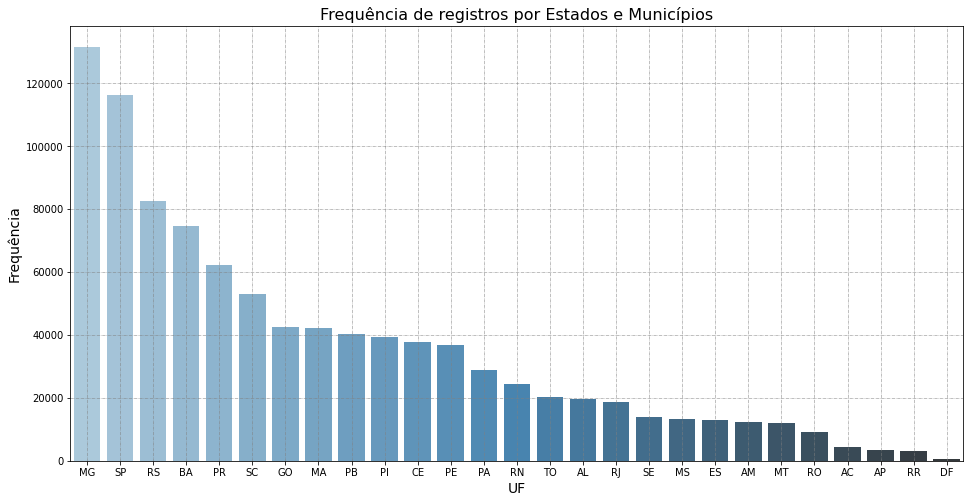

In [11]:
ax = sns.barplot(x=distribuicao_frequencia_estados_municipios.UF, y= distribuicao_frequencia_estados_municipios.Frequencia, palette="Blues_d")
ax.figure.set_size_inches(16, 8)
ax.set_title('Frequência de registros por Estados e Municípios', fontsize = 16)
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:

1. MG é o estado que mais possuí registros no dataset, seguido por SP, RS, BA e PR.
2. Na outra ponta do gráfico é possível observar que há uma relação entre os estados com menos registros e a região Norte do país. Observer que dos 7 estados da região, 5 deles aparecem como os estados com menor quantidade de registros (RR, AP, AC, RO e AM)

<font color='grey'>Hipóteses</font>
***

*   Será que o número de registros está relacionado ao número de casos e/ou mortes confirmadas por estados?
*   Será que os estados da região norte reportaram os números de forma correta?
*   Segundo a reportagem, a região Norte e Nordeste lideraram o número de mortes no início da pandemia no Brasil
[Norte e Nordeste lideram em óbitos por covid](https://noticias.uol.com.br/saude/ultimas-noticias/redacao/2020/05/27/puxado-por-norte-e-nordeste-brasil-passa-dos-400-mil-casos-de-covid-19.htm)

**Vamos analisar a seguir**
***
*   Se o número de mortes está associada ao número de casos confirmados
*   Se há alguma relação com a região dos estados

In [12]:
# convertendo a variável date para o tipo datetime
dados_covid['date'] = pd.to_datetime(dados_covid['date'], yearfirst=True)

In [13]:
#dados_covid['date'] = pd.to_datetime(dados_covid['date']).dt.date

In [14]:
# verificando a quantidade de registros True para a variável [is_last] por estado [state]
dados_covid.query("is_last == True and place_type == 'state' ").shape[0]

27

In [15]:
dados_covid.query("place_type == 'state' ").shape[0]

6515

In [16]:
data_mais_antiga = dados_covid.date.min()
data_mais_recente = dados_covid.date.max()
print('O dataset possuí registros de {} até {}'.format(data_mais_antiga, data_mais_recente))
print('A quantidade de dias no dataset é {}'.format(data_mais_recente-data_mais_antiga))
print('Se cada estado tiver um registro por dia no dataset, o valor de registro deve ser {}'.format((data_mais_recente-data_mais_antiga)*dados_covid.query("is_last == True and place_type == 'state' ").shape[0]))

O dataset possuí registros de 2020-02-25 00:00:00 até 2020-11-12 00:00:00
A quantidade de dias no dataset é 261 days 00:00:00
Se cada estado tiver um registro por dia no dataset, o valor de registro deve ser 7047 days 00:00:00


###Criando um dataframe com registros somente dos estados

<font color='red'>Observação</font>
***
A partir de agora estaremos analisando somente os registros por estados

In [17]:
dados_covid_estados = dados_covid.copy()
dados_covid_estados = dados_covid_estados.query("place_type == 'state' ")
# deletando a variável city
dados_covid_estados.drop('city', axis= 1, inplace= True)
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-12,AC,state,32515,707,241,True,881935.0,894470.0,12.0,3635.11353,0.0217
1,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220
2,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221
3,2020-11-09,AC,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221
4,2020-11-08,AC,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220


####Criando novas variáveis no dataframe

In [18]:
# criando uma lista com todos os estados no datset
lista_estados = dados_covid_estados.state.unique()
# criando a lista de lista de todos os novos casos utilizando a função diff para cada estado
novos_casos = [dados_covid_estados.query('state == @estado')['confirmed'].diff() for estado in lista_estados]
# criando a nova variável [new_cases] no dataframe
dados_covid_estados['new_cases'] = [item for lista_estados in novos_casos for item in lista_estados]
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,new_cases
0,2020-11-12,AC,state,32515,707,241,True,881935.0,894470.0,12.0,3635.11353,0.0217,NaN
1,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220,-402.0
2,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221,-187.0
3,2020-11-09,AC,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221,-138.0
4,2020-11-08,AC,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220,-81.0


In [19]:
# verificando a quantidade de NaN values na nova coluna
# como temos 27 estados, devemos ter 27 NaN values
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 27


In [20]:
# substituíndo valores nulos da variável new_cases por 0.0
dados_covid_estados.new_cases.fillna(value=0.0, inplace=True)
print('A quantidade de registros nulos na variável new_cases é {}'.format(dados_covid_estados.query("new_cases == 'Nan' ").shape[0]))

A quantidade de registros nulos na variável new_cases é 0


In [21]:
# criando a variável de semana do ano de acordo com a data
dados_covid_estados['week_number_of_year'] = dados_covid_estados['date'].dt.isocalendar().week
# criando a variável mês de acordo com a data
dados_covid_estados['month'] = dados_covid_estados['date'].dt.month

In [22]:
# criando a variável uf_code
dados_covid_estados['uf_code'] = dados_covid_estados.state.map(uf_code)

In [23]:
# extraindo a lista de UF
lista_uf_num = dados_covid_estados['uf_code'].astype(int).tolist()
# criando variável regiao
dados_covid_estados['regiao'] = [codigo_uf_para_regiao(i) for i in lista_uf_num]

In [24]:
dados_covid_estados.head()

,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,new_cases,week_number_of_year,month,uf_code,regiao
0,2020-11-12,AC,state,32515,707,241,True,881935.0,894470.0,12.0,3635.11353,0.0217,0.0,46,11,12,Norte
1,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220,-402.0,46,11,12,Norte
2,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221,-187.0,46,11,12,Norte
3,2020-11-09,AC,state,31788,701,238,False,881935.0,894470.0,12.0,3553.83635,0.0221,-138.0,46,11,12,Norte
4,2020-11-08,AC,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220,-81.0,45,11,12,Norte


####Verificação de frequência e percentual para os registros por estados

In [25]:
# verificando a distriuíção de frequência para a variável [state]
frequencia = dados_covid_estados.state.value_counts()
# verificando a distriuíção de frequência % para a variável [state]
percentual = (dados_covid_estados.state.value_counts(normalize=True)*100).round(2)
# criando dataframe para visualizar os dados
distribuicao_frequencia_estados = pd.DataFrame({'Frequencia' : frequencia, 'Percentual' : percentual})
distribuicao_frequencia_estados.reset_index(drop=False, inplace= True)
distribuicao_frequencia_estados.rename({'index' : 'UF'}, axis=1, inplace= True)
distribuicao_frequencia_estados

,UF,Frequencia,Percentual
0,SP,256,3.93
1,ES,252,3.87
2,BA,250,3.84
3,DF,250,3.84
4,MG,248,3.81
5,AL,247,3.79
6,PB,246,3.78
7,GO,246,3.78
8,PE,246,3.78
9,SC,245,3.76


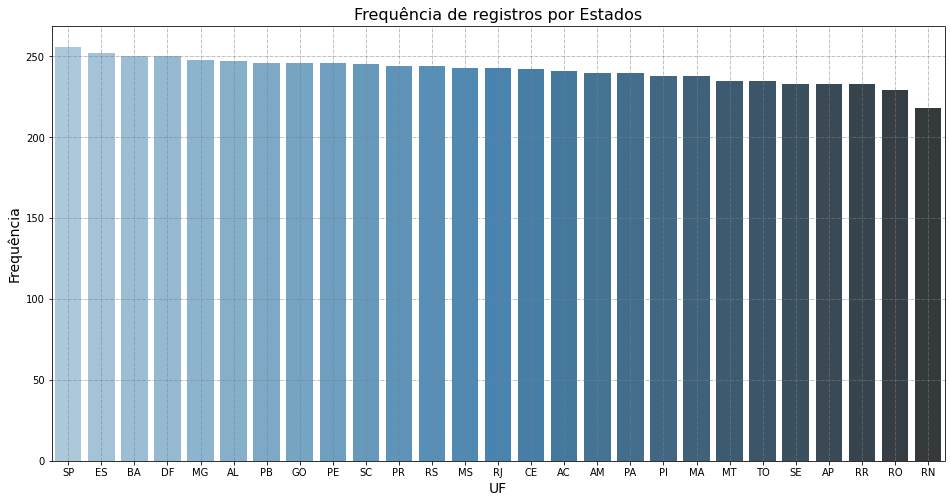

In [26]:
ax = sns.barplot(x=distribuicao_frequencia_estados.UF, y= distribuicao_frequencia_estados.Frequencia, palette="Blues_d")
ax.figure.set_size_inches(16, 8)
ax.set_title('Frequência de registros por Estados', fontsize = 16)
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Frequência', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:
1. Quando analisamos somente no nível de estados e não mais municípios, a quantidade de registros parece ser semelhante entre eles.
2. O estado de MG que na visualização anterior era o estado com mais registros, agora aparece na 5° enquato o DF que era o último, agora é o 4° colocado.

**Vamos analisar a seguir**
***
O número de casos e mortes confirmadas por estado



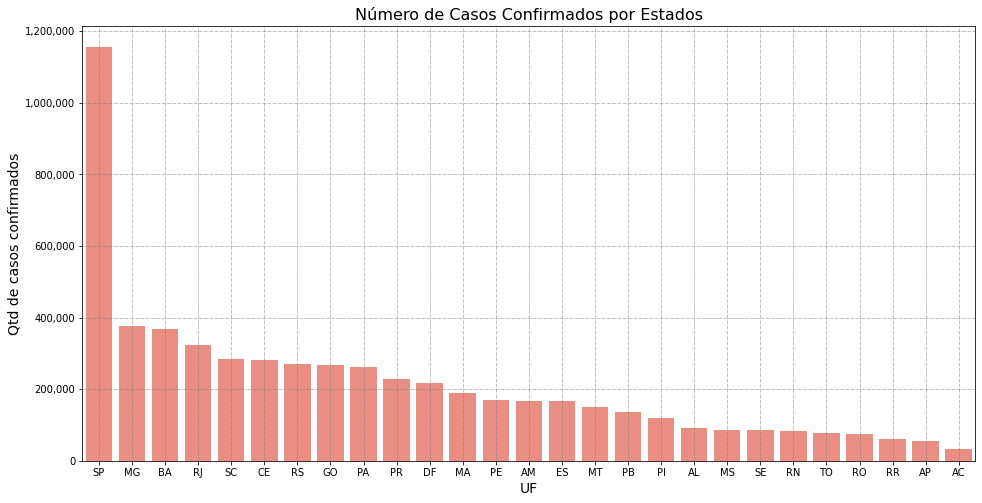

In [27]:
ax = sns.barplot(x=dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state, y=dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed, color="salmon")
ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Casos Confirmados por Estados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Na visualização acima é possível observar:

1. O estado de **SP é o estado com maior número de casos confirmados do país**. Seguido por MG, BA, RJ e SC como os **5 estados com maior** número de casos confirmados do Brasil.
2. Quando comparamos o estado de SP a MG, o estado de SP possuí quase três vezes mais o número de casos que o MG. Enquanto o MG e BA, possuem número de casos confirmados praticamente semelhantes

**Vamos analisar a seguir**
***
*   Se o número de mortes está associada ao número de casos confirmados



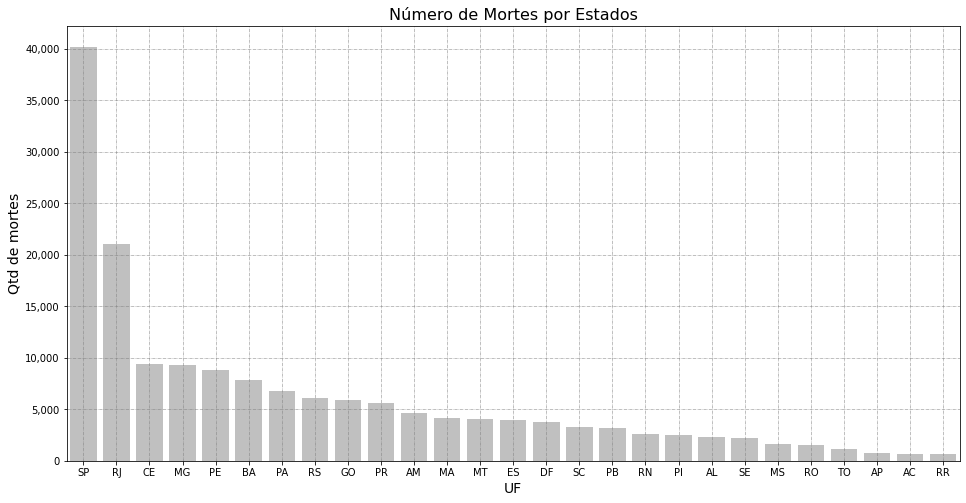

In [28]:
ax = sns.barplot(x=dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).state, y=dados_covid_estados.query("is_last == True").sort_values(by=['deaths'], ascending=False).deaths, color="silver")
ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Mortes por Estados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Qtd de mortes', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

<font color='Orange'>Pensa comigo e vamos refletir...</font>
***
Aqui temos algumas pontos importantes que devemos comentar:

1. O estado de SP **confirmar-se** com o estado com o maior número de casos e mortes do Brasil.
2. O segundo estado com maior número de mortes não é MG, mas RJ que na visualização anterior é o 4° estado com o maior número de casos registrados.
3. Aqui há um comportamento estranho, os estados de SC e PE que ocupam 5° e 13 posições respectivamente no número de casos confirmados, possuem um comportamento diferente no número de mortes. O estado de PE é o 5° estado com maior número de mortes, enquanto SC ocupa a 16° posição.

<font color='grey'>Questinamentos</font>
***

*   Por que o estado de SP é o estado com maior número de casos e mortes confirmadas? Será que esses números estão relacionados ao tamanho da população por estados?
*   O que aconteceu nos casos onde a posição dos estados inverteu, por exemplo, MG e RJ?
*   Os estados não estão reportando os números de forma correta, a população não está procurando assistência médica ou os estados adotaram medidas mais restritivas?
*   O que aconteceu com os estados de PE e SC para terem o comportamento acima?

**Vamos analisar a seguir**
***

*   O número de casos e mortes confirmadas dos 5 estados ordenados pelo número de casos confirmados
*   Os números dos estados de PE e SC



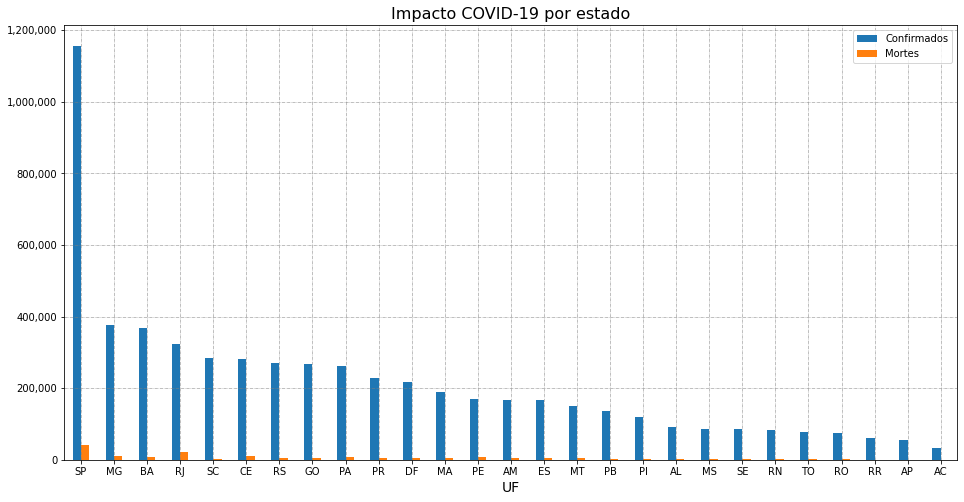

In [46]:
casos_confirmados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed).tolist()
numero_de_mortes = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).deaths).tolist()
estados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state).tolist()
df = pd.DataFrame({'Confirmados': casos_confirmados,'Mortes': numero_de_mortes}, index=estados)
ax = df.plot.bar(rot=0)
ax.figure.set_size_inches(16, 8)
ax.set_title('Impacto COVID-19 por estado', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
#ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

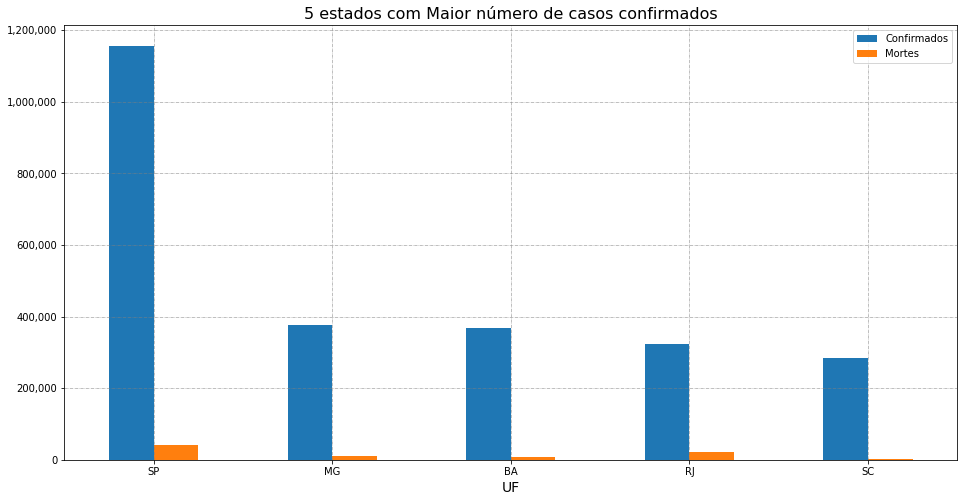

In [47]:
casos_confirmados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed.head()).tolist()
numero_de_mortes = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).deaths.head()).tolist()
estados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state.head()).tolist()
df = pd.DataFrame({'Confirmados': casos_confirmados,'Mortes': numero_de_mortes}, index=estados)
ax = df.plot.bar(rot=0)
ax.figure.set_size_inches(16, 8)
ax.set_title('5 estados com Maior número de casos confirmados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
#ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

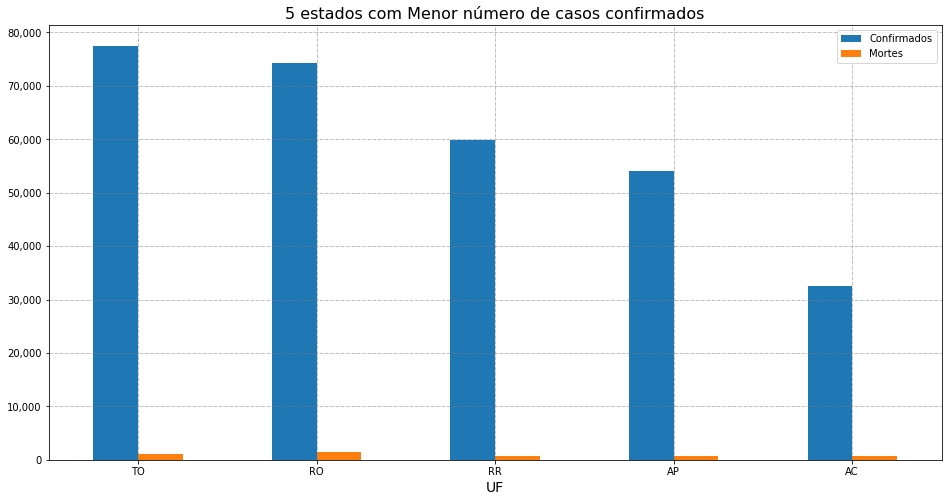

In [48]:
casos_confirmados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed.tail()).tolist()
numero_de_mortes = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).deaths.tail()).tolist()
estados = (dados_covid_estados.query("is_last == True").sort_values(by=['confirmed'], ascending=False).state.tail()).tolist()
df = pd.DataFrame({'Confirmados': casos_confirmados,'Mortes': numero_de_mortes}, index=estados)
ax = df.plot.bar(rot=0)
ax.figure.set_size_inches(16, 8)
ax.set_title('5 estados com Menor número de casos confirmados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
#ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

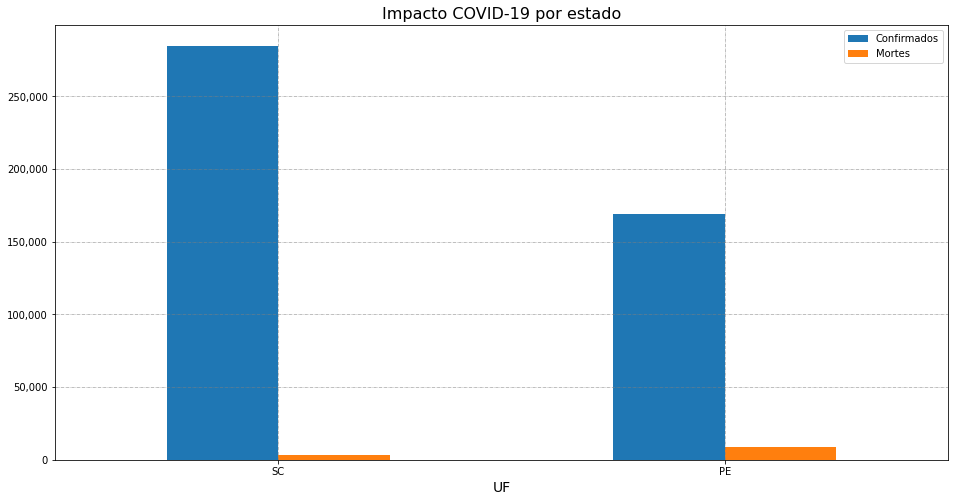

In [55]:
casos_confirmados = (dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed).tolist()
numero_de_mortes = (dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").sort_values(by=['confirmed'], ascending=False).deaths).tolist()
estados = (dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").sort_values(by=['confirmed'], ascending=False).state).tolist()
df = pd.DataFrame({'Confirmados': casos_confirmados,'Mortes': numero_de_mortes}, index=estados)
ax = df.plot.bar(rot=0)
ax.figure.set_size_inches(16, 8)
ax.set_title('Impacto COVID-19 por estado', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
#ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

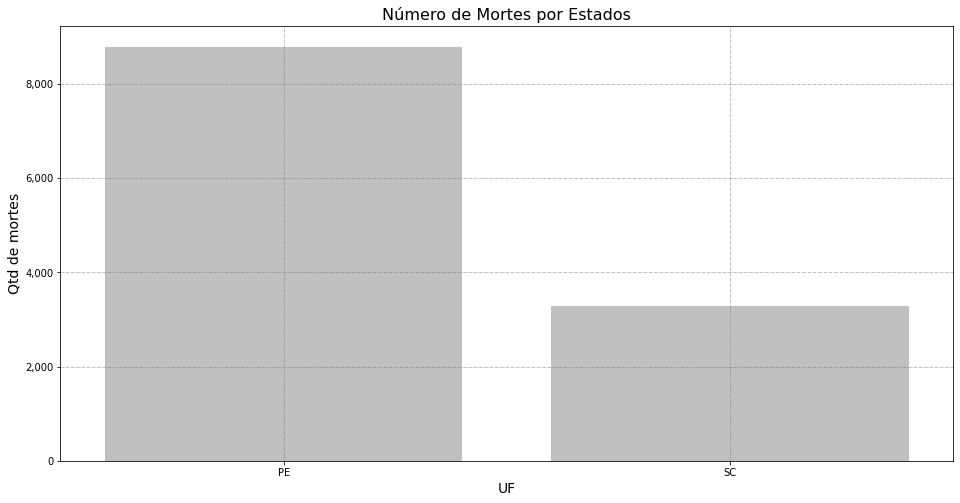

In [57]:
ax = sns.barplot(x=dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").state, y=dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").deaths, color="silver")
ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Mortes por Estados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Qtd de mortes', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

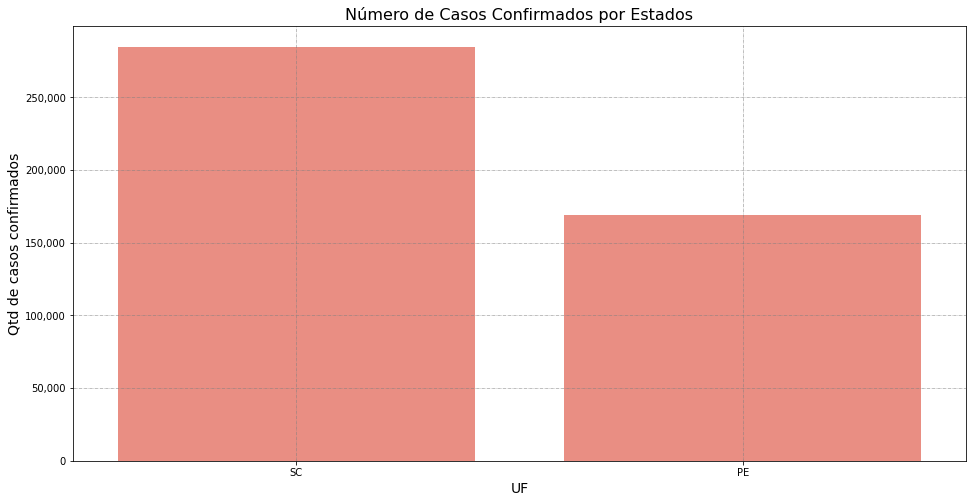

In [59]:
ax = sns.barplot(x=dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").sort_values(by=['confirmed'], ascending=False).state, y=dados_covid_estados.query("(state == 'SC' or state == 'PE') and is_last == True").sort_values(by=['confirmed'], ascending=False).confirmed, color="salmon")
ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Casos Confirmados por Estados', fontsize = 16)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.set_xlabel('UF', fontsize= 14)
ax.set_ylabel('Qtd de casos confirmados', fontsize = 14)
ax.grid(color='grey', linestyle='-.', linewidth=0.5, )
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax;

##Tabnet - Procedimentos hospitalares do SUS - por local de internação - Brasil

####Valor total por Unidade da Federação e Ano/mês processamento

In [32]:
url = 'https://raw.githubusercontent.com/reiskleiton/bootcampAluraDS/main/datasets/tabnet/A061120189_28_143_208.csv'

In [33]:
dados_tabnet = pd.read_csv(url,sep=';', skiprows=3, skipfooter=12, thousands='.', decimal=',', encoding='ISO-8859-1', na_values='-', engine='python')

In [34]:
dados_tabnet.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,302071

In [35]:
dados_tabnet.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,1.013743e+08,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,1.924162e+07,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,1.779065e+07,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417

#####Alterando variáveis no dataframe

In [36]:
# criando a variável [UF_COD] que contem o número da federação de cada estado
dados_tabnet_copy = dados_tabnet.copy()
dados_tabnet_copy['UF_COD'] = [valor[:2] for valor in dados_tabnet_copy['Unidade da Federação']]
dados_tabnet_copy['Unidade da Federação'] = [valor[3:] for valor in dados_tabnet_copy['Unidade da Federação']]
dados_tabnet_copy.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,UF_COD
0,Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08,11
1,Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08,12
2,Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09,13
3,Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2

In [37]:
# definindo a variável [Unidade da Federação] como index do dataframe
dados_tabnet_copy = dados_tabnet_copy.set_index('Unidade da Federação')
dados_tabnet_copy.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,UF_COD
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08,11
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08,12
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09,13
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2878177.60,2921978.36,2794080.79,2512259.50,250851

In [38]:
#extraindo a lista de UF
lista_uf_num = dados_tabnet_copy['UF_COD'].astype(int).tolist()

In [39]:
dados_tabnet_copy['REGIAO'] = [codigo_uf_para_regiao(i) for i in lista_uf_num]
dados_tabnet_copy.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,UF_COD,REGIAO
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08,11,Norte
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08,12,Norte
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09,13,Norte
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,28

In [40]:
# reordenando variáveis do dataframe
list(dados_tabnet_copy.columns)

['2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',

In [41]:
dados_tabnet_copy = dados_tabnet_copy[['UF_COD',
 'REGIAO',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',
 '2014/Mai',
 '2014/Jun',
 '2014/Jul',
 '2014/Ago',
 '2014/Set',
 '2014/Out',
 '2014/Nov',
 '2014/Dez',
 '2015/Jan',
 '2015/Fev',
 '2015/Mar',
 '2015/Abr',
 '2015/Mai',
 '2015/Jun',
 '2015/Jul',
 '2015/Ago',
 '2015/Set',
 '2015/Out',
 '2015/Nov',
 '2015/Dez',
 '2016/Jan',
 '2016/Fev',
 '2016/Mar',
 '2016/Abr',
 '2016/Mai',
 '2016/Jun',
 '2016/Jul',
 '2016/Ago',
 '2016/Set',
 '2016/Out',
 '2016/Nov',
 '2016/Dez',
 '2017/Jan',
 '2017/Fev',
 '2017/Mar',
 '2017/Abr',
 '2017/Mai',
 '2017/Jun',
 '2017/Jul',
 '2017/Ago',
 '2017/Set',
 '2017/Out',
 '2017/Nov',
 '2017/Dez',
 '2018/Jan',
 '2018/Fev',
 '2018/Mar',
 '2018/Abr',
 '2018/Mai',
 '2018/Jun',
 '2018/Jul',
 '2018/Ago',
 '2018/Set',
 '2018/Out',
 '2018/Nov',
 '2018/Dez',
 '2019/Jan',
 '2019/Fev',
 '2019/Mar',
 '2019/Abr',
 '2019/Mai',
 '2019/Jun',
 '2019/Jul',
 '2019/Ago',
 '2019/Set',
 '2019/Out',
 '2019/Nov',
 '2019/Dez',
 '2020/Jan',
 '2020/Fev',
 '2020/Mar',
 '2020/Abr',
 '2020/Mai',
 '2020/Jun',
 '2020/Jul',
 '2020/Ago',
 'Total']]

In [42]:
# ordenando dataframe pela variável [Total]
dados_tabnet_copy.sort_values(by=['Total'], ascending=False, inplace=True)
dados_tabnet_copy.head()

,UF_COD,REGIAO,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,35,Sudeste,91678473.48,1.486775e+08,1.560873e+08,1.612271e+08,1.871194e+08,1.872911e+08,1.943984e+08,1.848545e+08,1.886364e+08,1.797065e+08,1.679904e+08,1.918573e+08,1.827972e+08,1.868553e+08,2.127779e+08,2.031861e+08,2.170405e+08,2.171952e+08,2.207612e+08,2.325367e+08,2.202930e+08,2.219880e+08,2.201175e+08,2.090944e+08,2.145658e+08,2.031162e+08,2.272484e+08,2.315436e+08,2.301888e+08,2.260211e+08,2.296626e+08,2.345306e+08,2.334535e+08,2.211271e+08,2.397900e+08,2.369291e+08,2.275333e+08,2.310622e+08,...,2.705964e+08,2.978814e+08,2.973093e+08,2.808138e+08,2.857406e+08,2.807688e+08,2.800805e+08,2.792038e+08,2.695248e+08,2.867757e+08,2.897118e+08,2.931043e+08,2.879221e+08,2.915249e+08,2.987022e+08,2.827391e+08,2.956717e+08,2.839478e+08,2.831790e+08,2.981801e+08,2.794272e+08,2.888194e+08,2.978347e+08,3.038890e+08,2.935877e+08,3.050338e+08,3.138687e+08,2.985479e+08,3.108471e+08,2.928517e+08,2.847498e+08,3.045053e+08,2.888723e+08,2.973358e+08,2.513200e+08,2.724870e+08,3.064255e+08,3.667212e+08,3.465123e+08,3.892955e+10
Minas Gerais,31,Sudeste,45671659.76,7.019404e+07,7.923134e+07,7.713654e+07,8.055444e+07,9.475852e+07,8.536006e+07,8.472253e+07,8.460176e+07,8.555979e+07,7.832995e+07,8.691774e+07,9.137431e+07,9.015367e+07,9.529059e+07,9.409121e+07,9.907684e+07,9.618918e+07,1.027544e+08,1.000801e+08,9.691108e+07,9.795644e+07,1.007263e+08,9.535439e+07,9.901765e+07,9.151936e+07,1.016021e+08,1.020209e+08,1.033465e+08,1.024893e+08,1.044277e+08,1.043345e+08,1.020574e+08,1.022965e+08,1.046247e+08,1.060295e+08,1.028489e+08,1.030971e+08,...,1.432841e+08,1.468496e+08,1.526457e+08,1.444886e+08,1.439395e+08,1.451233e+08,1.428486e+08,1.431585e+08,1.367051e+08,1.498300e+08,1.498945e+08,1.515469e+08,1.515142e+08,1.566802e+08,1.542815e+08,1.538679e+08,1.512283e+08,1.448677e+08,1.467153e+08,1.540666e+08,1.479689e+08,1.534598e+08,1.567775e+08,1.629630e+08,1.548301e+08,1.662075e+08,1.642871e+08,1.565679e+08,1.651208e+08,1.530064e+08,1.538801e+08,1.591966e+08,1.501189e+08,1.427730e+08,1.333408e+08,1.333888e+08,1.396998e+08,1.648918e+08,1.680244e+08,1.916011e+10
Paraná,41,Centro-Oeste,38266347.46,5.538467e+07,5.380132e+07,5.246031e+07,5.441962e+07,5.781169e+07,5.809424e+07,5.698277e+07,5.754908e+07,5.712189e+07,5.311794e+07,6.391091e+07,6.452307e+07,6.078373e+07,6.563357e+07,6.475938e+07,6.590222e+07,6.628075e+07,6.915860e+07,6.825657e+07,6.584382e+07,6.639441e+07,6.639556e+07,6.707081e+07,6.549282e+07,6.223772e+07,7.070254e+07,7.037469e+07,7.205818e+07,7.193555e+07,7.237187e+07,7.470806e+07,7.278591e+07,7.285175e+07,7.559573e+07,7.436610e+07,7.511031e+07,7.212862e+07,...,1.106957e+08,1.163592e+08,1.178723e+08,1.118784e+08,1.153320e+08,1.146690e+08,1.151739e+08,1.187996e+08,1.103078e+08,1.166302e+08,1.200610e+08,1.213607e+08,1.221746e+08,1.246103e+08,1.278745e+08,1.239330e+08,1.253168e+08,1.253173e+08,1.175288e+08,1.224609e+08,1.198365e+08,1.232868e+08,1.201772e+08,1.264818e+08,1.255286e+08,1.259789e+08,1.261745e+08,1.269544e+08,1.315783e+08,1.270907e+08,1.178963e+08,1.223495e+08,1.270001e+08,1.173081e+08,9.459940e+07,1.075038e+08,9.697729e+07,1.096584e+08,1.293759e+08,1.378696e+10
Rio Grande do Sul,43,Centro-Oeste,30931325.46,5.736342e+07,5.

#####Indentificando e tratando valores nulos (nan) no dataframe

In [43]:
assess_NA(dados_tabnet_copy)

,Number of NA,Percent NA
2020/Ago,1,3.7
2009/Set,1,3.7


In [44]:
columns_null_values(dados_tabnet_copy)

,2009/Set,2020/Ago
Unidade da Federação,,
São Paulo,2.202930e+08,3.465123e+08
Minas Gerais,9.691108e+07,1.680244e+08
Paraná,6.584382e+07,1.293759e+08
Rio Grande do Sul,6.642501e+07,1.013743e+08
Rio de Janeiro,5.202772e+07,9.527449e+07
Bahia,5.383907e+07,8.079312e+07
Pernambuco,3.797107e+07,7.570418e+07
Santa Catarina,3.738038e+07,6.397238e+07
Ceará,3.447158e+07,5.980861e+07


**NOTA:** Em nossa base há dois valores nulos para o estado do Acre.

Os valores foram ajustado de acordo com a documentação do Tabnet, que sugere que os valores sejam substituídos por 0.0

In [45]:
# substituindo valores nulos encontrados por (0.0)
dados_tabnet_copy.fillna(0.0, inplace= True)